In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import m5_helpers
from pylbm import lbm


In [167]:
x_dim = 50
y_dim = 40
epochs = 3000
omega = 1.5
rho_in = 1.01
rho_out = 0.99
velocities, f_cxy = m5_helpers.m5_1(x_dim=x_dim, y_dim=y_dim, epochs=epochs, omega=omega, rho_in=rho_in, rho_out=rho_out)

In [168]:
num_plots = 2
print_epoch = round(epochs / num_plots)
if print_epoch == 0:
    print_epoch = 1

vel_print = []
for t in range(len(velocities)):
    if t % print_epoch == print_epoch-1:
        vel_print.append((velocities[t], t))

In [169]:
# fig = plt.figure(figsize=(30,20))
# plt.axis('off')
# fig = m5_helpers.m5_1_fig(fig, x_dim=x_dim, y_dim=y_dim, velocities=vel_print)
# plt.show()
# plt.close()

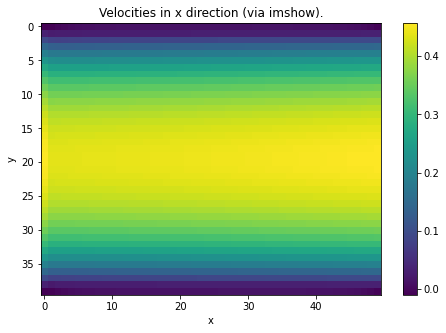

In [170]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title("Velocities in x direction (via imshow).")
ax.set_xlabel('x')
ax.set_ylabel('y')

im = ax.imshow(velocities[-1][0,:,:].T)
plt.colorbar(im, ax=ax)
plt.show()
plt.close()

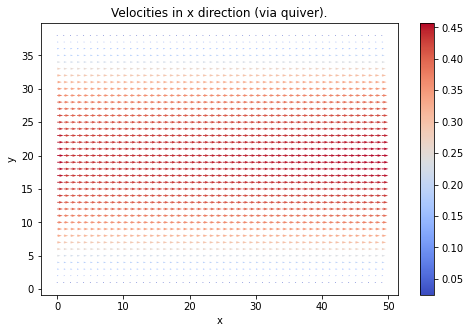

In [171]:
fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(x_dim)
y = np.arange(y_dim)
X,Y = np.meshgrid(x, y[1:-1])

ax.set_title("Velocities in x direction (via quiver).")
ax.set_xlabel('x')
ax.set_ylabel('y')

u_axy = velocities[-1]
magnitude = np.sqrt(u_axy[0,:,1:-1]**2 + u_axy[1,:,1:-1]**2)
quiver = ax.quiver(X,Y, u_axy[0,:,1:-1].T, u_axy[1,:,1:-1].T, magnitude.T, cmap='coolwarm')
plt.colorbar(quiver, ax=ax)
plt.show()
plt.close()

In [172]:
vs_theo = 1/3*(1/omega-0.5)
rho_init = 1.
nu = rho_init * vs_theo

In [173]:
rho_in = 1.01
rho_out = 0.99
roh_change = (rho_in - rho_out)
N = x_dim - 1
h = y_dim
dp_dx = roh_change * (1/3) / N # dp/dx ist uberall konstant
y = np.arange(y_dim+1) + 0

u_y = 1/(2 * nu) * (dp_dx) * y * (h-y)

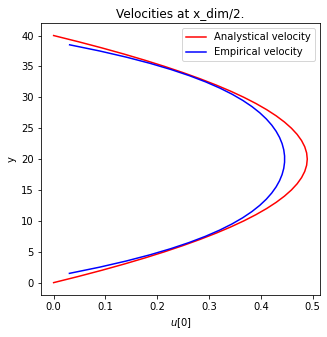

In [175]:
fig, ax = plt.subplots(figsize=(5,5))
# ax.plot(u_axy[0,int(u_axy.shape[1]/2), 1:-1], np.arange(y_dim-2)+0.5)

ax.plot(u_y, np.arange(y_dim+1), color='red',  label="Analystical velocity")
ax.plot(u_axy[0,int(u_axy.shape[1]/2), 1:-1], np.arange(y_dim-2)+1.5, color='blue', label="Empirical velocity")
ax.set_title("Velocities at x_dim/2.")
ax.set_xlabel('$u[0]$')
ax.set_ylabel('y')
ax.legend()
plt.show()
plt.close()